In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def RK(xi, theta0, dtheta0, h, p):
    """  
    Args: 
        xi: xi to solve the equation up to
        x0: starting value of x, at t = 0
        h:  step size of the method 
        p: polytropic index"""
    
    xi = np.arange(0.00000001,xi+h,h) #xi = 0 breaks so  used 0.00000001
    # n is the number of steps
    n = np.shape(xi)[0]
    theta = np.zeros(n) 
    dtheta = np.zeros(n)
    
    #Set the initial value of theta and dtheta
    theta[0] = 1-(0.00000001**2)/6 #solution for n=0 to approximate theta at xi = 0.0000001 (since xi=0 can't be used)
    dtheta[0] = -0.00000001/3 #derivative of the line above
    
    #Loop over the xi values and calculate the derivative of theta
    #solving d2theta/dxi2 = -(2dtheta)/dxi-theta^p and dtheta/dxi = theta'
    for i in range(1,n): 
        k1t = h*dtheta[i-1]
        k1dt = h*(-(2*dtheta[i-1])/(xi[i-1])-theta[i-1]**p) #xi[i-1] = 0
        
        k2t = h*(dtheta[i-1]+k1dt/2)
        k2dt = h*(-(2*(dtheta[i-1]+k1dt/2))/(xi[i-1]+h/2)-(theta[i-1]+k1t/2)**p)

        k3t = h*(dtheta[i-1]+k2dt/2)
        k3dt = h*(-(2*(dtheta[i-1]+k2dt/2))/(xi[i-1]+h/2)-(theta[i-1]+k2t/2)**p)

        k4t = h*(dtheta[i-1]+k3dt)
        k4dt = h*(-(2*(dtheta[i-1]+k3dt))/(xi[i-1]+h)-(theta[i-1]+k3t)**p)

        
        theta[i] = theta[i-1]+(1/6*k1t)+(1/3*k2t)+(1/3*k3t)+(1/6*k4t)
        dtheta[i] = dtheta[i-1]+(1/6*k1dt)+(1/3*k2dt)+(1/3*k3dt)+(1/6*k4dt)

    return(theta, xi) 


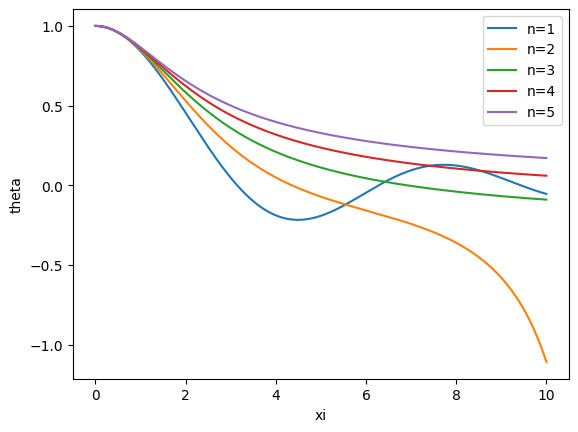

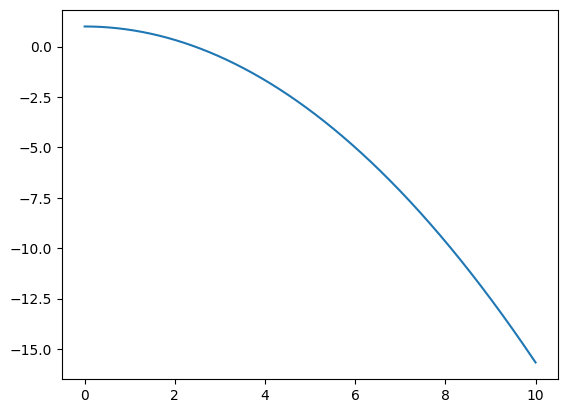

In [9]:
theta0, xi0 = RK(10,1,0,0.0001,0)
theta1, xi1 = RK(10,1,0,0.0001,1)
theta2, xi2 = RK(10,1,0,0.0001,2)
theta3, xi3 = RK(10,1,0,0.0001,3)
theta4, xi4 = RK(10,1,0,0.0001,4)
theta5, xi5 = RK(10,1,0,0.0001,5)

#plt.plot(xi0,theta0,label="n=0") #this changes the scale so the others can't really be seen
plt.plot(xi1,theta1,label="n=1")
plt.plot(xi2,theta2,label="n=2")
plt.plot(xi3,theta3,label="n=3")
plt.plot(xi4,theta4,label="n=4")
plt.plot(xi5,theta5,label="n=5")
plt.xlabel("xi")
plt.ylabel("theta")
plt.legend()
#plt.savefig("arbitraryn.pdf", format="pdf")
plt.show()

plt.plot(xi0,theta0,label="n=0")

In [13]:
#finds where is first crosses the x-axis and splits it there

negatives = np.where(theta1 <= 0)
z_p = negatives[0]
zero_point = int(z_p[0])
theta_physical = theta1[0:zero_point]
xi_physical = xi1[0:zero_point]
theta_non = theta1[zero_point:]
xi_non = xi1[zero_point:]


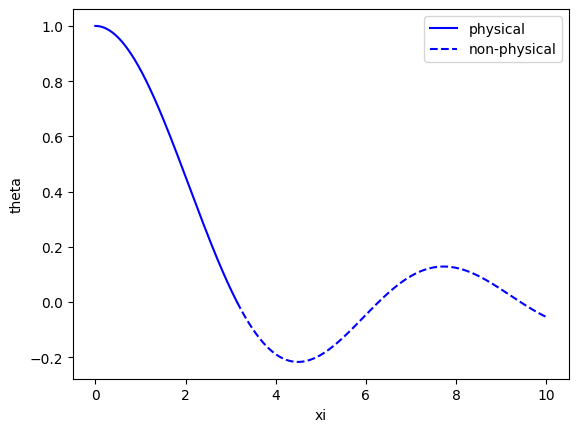

In [17]:
plt.plot(xi_physical,theta_physical,"b-",label="physical")
plt.plot(xi_non,theta_non,"b--",label="non-physical")
plt.xlabel("xi")
plt.ylabel("theta")
plt.legend()
plt.show()